## [Python Programming for Biologists, Tel-Aviv University / 0411-3122 / Spring 2016](http://py4life.github.io/TAU2016/)
# Homework 6

# Part A: Analyzing human proinsulin
In this exercise, we will process and analyze the human proinsulin transcript using Biopython.  
All the information that will be used is stored in GenBank record AY899304. It is recommended that you [inspect it](http://www.ncbi.nlm.nih.gov/nuccore/AY899304.1) before starting to work.

### 1) Fetching the GenBank record
Write a function that receives a GenBank id (such as AY899304) and returns a Biopython SeqRecord object of the corresponding result. Use it to fetch the human proinsulin transcript record. Assume the default settings, as shown in class. Ignore any warning messages from NCBI that might be displayed.

In [1]:
from Bio import Entrez
from Bio import SeqIO

def fetch_gb_by_id(rec_id):
    Entrez.email = "A.N.Other@example.com" #unnecessary; to prevent Entrez warning
    handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id=rec_id)
    
    gb_record = SeqIO.read(handle, "gb")
    handle.close()
    return gb_record

proinsulin_transcript = fetch_gb_by_id('AY899304')
print(proinsulin_transcript.description)
assert(proinsulin_transcript.description == "Homo sapiens proinsulin mRNA, complete cds, alternatively spliced.")

Homo sapiens proinsulin mRNA, complete cds, alternatively spliced.


### 2) Extracting information
The record fetched in section 1 is the complete sequence of the proinsulin transcript. We will now extract information from this sequence.  
__a)__ Write a function that returns the mRNA sequence.  Make sure it is a Seq object. See the example for class.

In [2]:
from Bio.Seq import Seq
def get_sequence(gb_record):
    transcript_seq = gb_record.seq
    return transcript_seq

proinsulin_transcript_seq = get_sequence(proinsulin_transcript)
print(proinsulin_transcript_seq)
assert type(proinsulin_transcript_seq) == Seq
assert len(proinsulin_transcript_seq) == 396

GCCATCAAGCAGGTCTGTTCCAAGGGCCTTTGCGTCAGATCACTGTCCTTCTGCCATGGCCCTGTGGATGCGCCTCCTGCCCCTGCTGGCGCTGCTGGCCCTCTGGGGACCTGACCCAGCCGCAGCCTTTGTGAACCAACACCTGTGCGGCTCACACCTGGTGGAAGCTCTCTACCTAGTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGACCTGCAGGTGGGGCAGGTGGAGCTGGGCGGGGGCCCTGGTGCAGGCAGCCTGCAGCCCTTGGCCCTGGAGGGGTCCCTGCAGAAGCGTGGCATTGTGGAACAATGCTGTACCAGCATCTGCTCCCTCTACCAGCTGGAGAACTACTGCAACTAGACGCAGCC


__b)__ The __CDS__ of an mRNA contains a 5'-UTR and 3'-UTR sequences. Write a function that receives the sequence object and the start and end position of the open reading frame (i.e., from where to where the CDS codes to protein) and returns the translation using biopython functions.

In [3]:
def translate_seq_to_aa(seq_obj, start, end):
    translated_seq = Seq.translate(seq_obj[start:end+1])    
    return translated_seq[:-1] # -1 to avoid the STOP codon

proinsulin_translated_seq = translate_seq_to_aa(proinsulin_transcript_seq, 55, -9)
print(proinsulin_translated_seq)
assert len(proinsulin_translated_seq) == 110

MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN




A sequence record includes many _features_, such as CDS, STS, genes and other. To access the features of the `proinsulin_transcript` SeqRecord, simply use `proinsulin_transcript.features`.  
Let's explore the features field of the record and see some examples by running the following code:

In [4]:
proinsulin_transcript_features = proinsulin_transcript.features
print(type(proinsulin_transcript_features))
print(type(proinsulin_transcript_features[0]))
print('************')
print(proinsulin_transcript_features[0])
print('************')
print(proinsulin_transcript_features[1])
print('************')
print(proinsulin_transcript_features[2])

<class 'list'>
<class 'Bio.SeqFeature.SeqFeature'>
************
type: source
location: [0:396](+)
qualifiers:
    Key: db_xref, Value: ['taxon:9606']
    Key: mol_type, Value: ['mRNA']
    Key: organism, Value: ['Homo sapiens']

************
type: misc_feature
location: [12:38](+)
qualifiers:
    Key: note, Value: ['retained partial intron']

************
type: CDS
location: [55:388](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GI:59036749']
    Key: note, Value: ['alternatively spliced']
    Key: product, Value: ['proinsulin']
    Key: protein_id, Value: ['AAW83741.1']
    Key: translation, Value: ['MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN']



We can see that there are different types of features, and that each one contains several fields of information. We will only need the `type`, the `location` and the `qualifiers` fields, which We can access like this:

In [5]:
cds = proinsulin_transcript.features[2]
print(cds.type)
print(cds.location)
print(cds.qualifiers)
print(type(cds.qualifiers))

CDS
[55:388](+)
{'note': ['alternatively spliced'], 'codon_start': ['1'], 'db_xref': ['GI:59036749'], 'product': ['proinsulin'], 'translation': ['MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'], 'protein_id': ['AAW83741.1']}
<class 'dict'>


__c)__ Write a function that receives a SeqRecord and extract its __translation__ from CDS to protein. The function should return a Seq object. Note that the translation is denoted in the `proinsulin_transcript` SeqRecord, in the CDS feature.

In the end, we assert that your translation matches the protein sequence.

In [6]:
def extract_aa_seq(gb_record):
    
    for record_feature in gb_record.features:
        # if feature is CDS, then we need one of its field. Note that it's a dictionary!
        if record_feature.type == "CDS":
            aa_seq = record_feature.qualifiers['translation'][0]
            
    return Seq(aa_seq)

proinsulin_aa_seq = extract_aa_seq(proinsulin_transcript)
print(len(proinsulin_aa_seq))
print(type(proinsulin_aa_seq))
assert len(proinsulin_aa_seq) == 110
assert type(proinsulin_aa_seq) is Seq

assert proinsulin_aa_seq == proinsulin_translated_seq

110
<class 'Bio.Seq.Seq'>


# Part B: Data analysis

Files for this section can be found [here](https://github.com/Py4Life/TAU2016/raw/master/files_for_hw6_partB.rar). It contains two files: "bacterial_growth.csv" for question 1 and "TradeoffData.csv" for section 2.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1) Time-series analysis

In this exercise we will do a simple time series analysis. 
The data is taken from an experiment that measures the growth of bacteria (_E. coli_) in a [96 wells microplate](http://upload.wikimedia.org/wikipedia/commons/0/07/Microplate_with_reagents.jpg). The growth is measured in OD (optical density) over time in seconds.

The data file is in CSV format (comma separated values). The first row in the file is the time of measurements. The next 96 rows are the OD values in each well at each time points. You can find this in the data file "bacterial_growth.csv" in the [files for download above](https://github.com/Py4Life/TAU2016/raw/master/files_for_hw6_partB.rar).

**a)** Start by loading the data using the `loadtxt` function in `numpy`. Note that in order to load a CSV file you must give it the proper `delimiter` argument (see lecture 8).
After you load the data, put the first row of the data in a variable called `t` (for time) and the rest of the rows in a variable called `OD`. Make sure (`assert`) that `OD` has 96 rows and that the number of columns in `OD` is equal to the length of `t`.

In [8]:
data = np.loadtxt('bacterial_growth.csv', delimiter=',')
print(data.shape)
print(data[0,:5])
print (data[1:5,:5])

(97, 89)
[    0.    836.8  1676.5  2513.2  3350. ]
[[ 0.11    0.1099  0.1105  0.1105  0.1116]
 [ 0.1077  0.107   0.1069  0.1057  0.1063]
 [ 0.1145  0.1144  0.1139  0.1139  0.1145]
 [ 0.1104  0.1097  0.1095  0.1092  0.1098]]


In [9]:
t = data[0,:]
OD = data[1:,:]
assert OD.shape[0] == 96
assert len(t) == OD.shape[1]

**b)** Plot all the growth cruves - one per well, or per row in the data. Matplotlib will assign each line you plot with a different color. Note that Matplotlib expects the length of `x` and `y` to be equal, but the length of `OD` is 96. To fix this you can [_transpose_](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html) `OD`.
Don't forget to label the x and y axes.

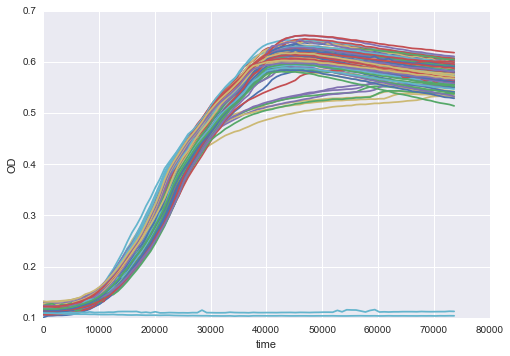

In [10]:
plt.plot(t, OD.T)
plt.xlabel('time')
plt.ylabel('OD');

**c)** Now we want to present an aggregated version of the previous plot. In the next plot we will plot the mean and SEM (standrad error of the mean) of the OD values across the wells at each time point. We will present the result as a line with errorbars, where the length of the errorbars is given by the SEM. Reminders:
- SEM is calculated as the standard deviation devided by the square root of the number of samples.
- To plot an errorbar plot you can use Matplotlib's [errobar function](http://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html)
- To calculate the mean and SEM have a look at lecture 8).
- Use `assert` to make sure you get what you expect: becuase we want to do a mean over all the wells we expect the result of the mean to have the same length as `t`.

In [11]:
mean_OD = OD.mean(axis=0)
assert len(mean_OD) == len(t)
std_OD = OD.std(axis=0, ddof=1)
assert len(std_OD) == len(t)
sem_OD = std_OD / np.sqrt(len(std_OD))
assert (sem_OD < std_OD).all()

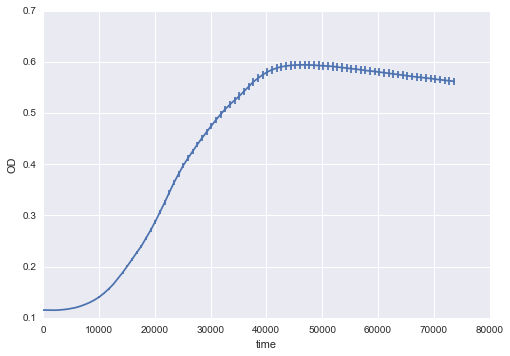

In [12]:
plt.errorbar(t, mean_OD, sem_OD)
plt.xlabel('time')
plt.ylabel('OD');

**d)** Finally, we want to check thed distributions of the maximum and minimum OD values in each well (row of data). To do this, we will calculate the maximum and minimum OD over time in each well and plot two histograms, one for the maximum OD and one for the minimum OD.

- There are several ways to plot two plots in the same figure. We  recommend [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html).
- To plot the histogram you could calculate the histogram and plot with a `bar` plot, but a better, easier way to do this is with the [`hist`](http://matplotlib.org/examples/pylab_examples/histogram_demo_extended.html) function. Make sure you use enough bins to make the plot intersting but not too much.
- Use `assert` to make sure you aggregated on the right axis: check the length of the aggregation result against you expectation.

In [13]:
max_OD = OD.max(axis=1)
min_OD = OD.min(axis=1)

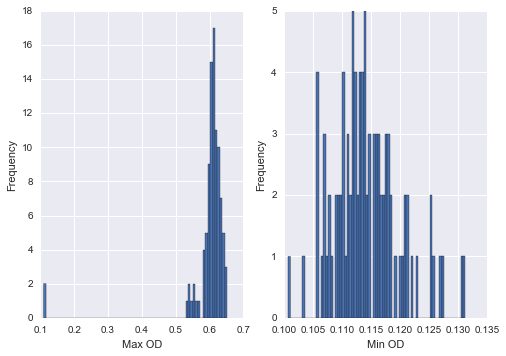

In [14]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(max_OD, bins=75)
ax[0].set_xlabel('Max OD')
ax[0].set_ylabel('Frequency')
ax[1].hist(min_OD, bins=75)
ax[1].set_xlabel('Min OD')
ax[1].set_ylabel('Frequency');

## 2) Split-apply-combine

In this question we will learn how to use the very useful [split-apply-combine](http://nbviewer.ipython.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_12_pandas_groupby.ipynb) paradigm in _Pandas_ and how to use it to create sophisticated plots with very little coding.

Start by reading this [blog post](http://bconnelly.net/2013/10/summarizing-data-in-python-with-pandas/) by Brian Connelly
which described the data and functions we will use.

**0)** Look at the file "TradeoffData.csv" in the [files for download above](https://github.com/Py4Life/TAU2016/raw/master/files_for_hw6_partB.rar).

> This data set contains the fitness of a flocculated strain of Escherichia coli relative to a non-floculated strain when grown alone in either spatially-structured (dish) or spatially-unstructured (tube) environments.

Use the `read_csv` function in `pandas` which can open csv files from the local filesystem using a filename or from a remote resource using a URL. After reading the file into a variable called `data` (in your research consider using a less generic name for the `DataFrame` variable), view it by calling the method `head` to see the first few rows in `data`.

In [15]:
data = pd.read_csv('TradeoffData.csv')
data.head()

,Group,Treatment,Replicate,RelativeFitness
0,BKB,Tube,1,0.869963
1,BKB,Tube,2,1.000363
2,BKB,Tube,3,0.982935
3,BAC,Tube,1,0.810392
4,BAC,Tube,2,0.795107


**a)** First, you should group the data by the `Treatment` variable and call the `describe` method on the grouped data to see a textual summary of the `RelativeFitness` distribution in each `Treatment` (`Dish` and `Tube`).

In [16]:
bytreatment = data.groupby('Treatment')
bytreatment.describe()

RelativeFitness  Replicate
Treatment                                  
Dish      count        32.000000  32.000000
          mean          1.456359   2.031250
          std           0.184792   0.822442
          min           0.955221   1.000000
          25%           1.429005   1.000000
          50%           1.510884   2.000000
          75%           1.581340   3.000000
          max           1.699276   3.000000
Tube      count        32.000000  32.000000
          mean          0.929589   1.968750
          std           0.050153   0.822442
          min           0.795107   1.000000
          25%           0.915050   1.000000
          50%           0.939089   2.000000
          75%           0.953505   3.000000
          max           1.000363   3.000000

**b)** Next, we want to plot a summary of the distribution of `RelativeFitness` in each of the `Treatment`s.
Here we aim at getting a plot of the mean or median of the `RelativeFitness` together with some meaure of the variance in the data. This can be achieved with a _boxplot_, _violinplot_, _whiskerplot_ and a regular plot with errorbars.

So - plot **either** a boxplot, violinplot or a plot with errorbars of the data. A boxplot will show the media, quartiles and outliers; the violinplot will show the entire distribution of values; the errorbar plot will show the mean and the standard deviation; factorplots are _seaborn_'s version of the `errorbar` plot.

Here are some references to get you started:

- [Violin Plots: A Box Plot-Density Trace Synergism](http://www.sci.utah.edu/~kpotter/Library/Papers/hintze:1998:VPDT/)
- [Violin plots](http://stanford.edu/~mwaskom/software/seaborn/examples/violinplots.html)
- [factor plots](http://stanford.edu/~mwaskom/software/seaborn/examples/grouped_boxplot.html)
- [Visualizing distributions of data](http://stanford.edu/~mwaskom/software/seaborn/tutorial/plotting_distributions.html)
- [boxplot with matplotlib](http://matplotlib.org/examples/pylab_examples/boxplot_demo.html)
- [violinplot with matplitlib](http://matplotlib.org/examples/statistics/violinplot_demo.html)

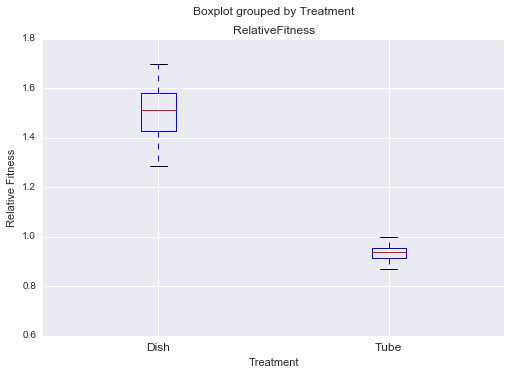

In [17]:
data.boxplot('RelativeFitness', 'Treatment')
plt.ylabel('Relative Fitness');

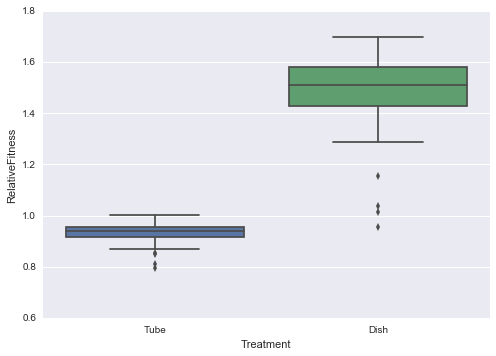

In [18]:
sns.boxplot(data.Treatment, data.RelativeFitness);

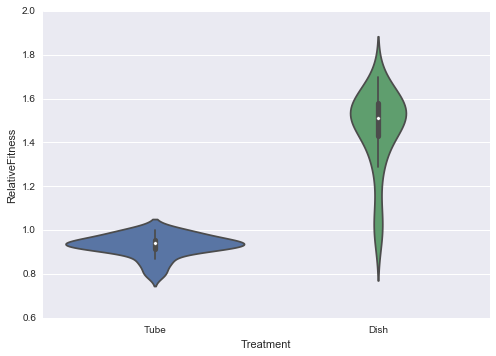

In [19]:
sns.violinplot(data.Treatment, data.RelativeFitness);

**c)** We now want to check if the variance between `Group`s in the same `Treatment` is large and if the `Treatment` had the same effect on all `Group`s.

Do a new grouping, this time by both `Group` and `Treatment`, and print the resut of the `describe` method.

In [20]:
bygroup_treatment = data.groupby(['Group', 'Treatment'])
bygroup_treatment.describe()

RelativeFitness  Replicate
Group Treatment                                  
BAC   Dish      count         2.000000   2.000000
                mean          1.633628   2.500000
                std           0.026313   0.707107
                min           1.615022   2.000000
                25%           1.624325   2.250000
                50%           1.633628   2.500000
                75%           1.642931   2.750000
                max           1.652234   3.000000
      Tube      count         2.000000   2.000000
                mean          0.802749   1.500000
                std           0.010808   0.707107
                min           0.795107   1.000000
                25%           0.798928   1.250000
                50%           0.802749   1.500000
                75%           0.806570   1.750000
                max           0.810392   2.000000
BKB   Dish      count         3.000000   3.000000
                mean          1.315682   2.000000
                std           0.179156   1.000000
                min           1.152544   1.000000
                25%           1.219815   1.500000
                50%           1.287085   2.000000
                75%           1.397250   2.500000
                max           1.507415   3.000000
      Tube      count         3.000000   3.000000
                mean          0.951087   2.000000
                std           0.070794   1.000000
                min           0.869963   1.000000
                25%           0.926449   1.500000
                50%           0.982935   2.000000
...                                ...        ...
PPP   Dish      std           0.036531   1.000000
                min           1.508969   1.000000
                25%           1.531269   1.500000
                50%           1.553568   2.000000
                75%           1.567477   2.500000
                max           1.581386   3.000000
      Tube      count         3.000000   3.000000
                mean          0.970277   2.000000
                std           0.020897   1.000000
                min           0.948767   1.000000
                25%           0.960166   1.500000
                50%           0.971565   2.000000
                75%           0.981033   2.500000
                max           0.990500   3.000000
SWI   Dish      count         3.000000   3.000000
                mean          1.451796   2.000000
                std           0.079652   1.000000
                min           1.362556   1.000000
                25%           1.419848   1.500000
                50%           1.477141   2.000000
                75%           1.496417   2.500000
                max           1.515692   3.000000
      Tube      count         3.000000   3.000000
                mean          0.918647   2.000000
                std           0.009692   1.000000
                min           0.909023   1.000000
                25%           0.913768   1.500000
                50%           0.918514   2.000000
                75%           0.923459   2.500000
                max           0.928405   3.000000

[176 rows x 2 columns]

**d)** Now use the `sns.FacetGrid` function to create a faceted plot of the distributions of `RelativeFitness`. Each facet should be similar to the plot you made in **(b)** (but you are free to choose a different plot type if you want to practice it!). Facet on either column (`col`) or row (`row`) to make a wide or long plot. 

Create two figures - in the first you facet according to `Treatment` and group by `Group`, and in the second vice-versa, facet by `Group` and group by `Treatment`. 

For clarity and bonus points, use the `hue` argument of `FacetGrid` and set it to the same variable as you facet by. 

Note that you may have to set the value of the argument `size` in `FacetGrid` to a number larger than the default 3.

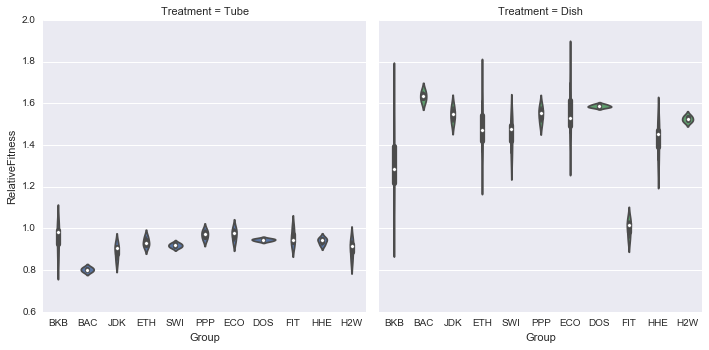

In [31]:
g = sns.FacetGrid(data, col='Treatment', hue='Treatment', size=5)
g.map(sns.violinplot, 'Group', 'RelativeFitness')
sns.despine()

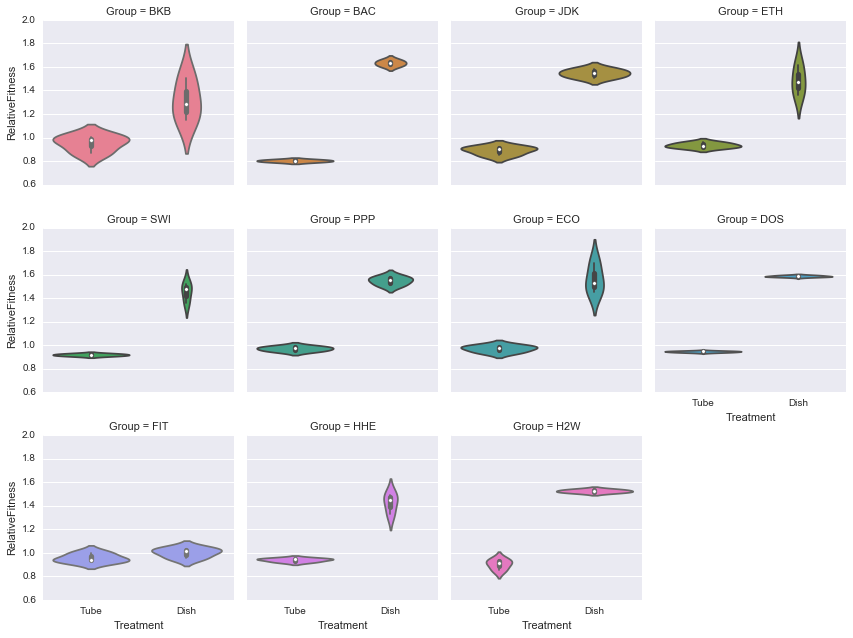

In [33]:
sns.set_palette('Paired')
g = sns.FacetGrid(data, col='Group', col_wrap=4, hue='Group', size=3)
g.map(sns.violinplot, 'Treatment', 'RelativeFitness')
sns.despine()

**e)** Finally, we want to save a file with the mean and standard deviation of `RelativeFitness` for each of the `Group`s and `Treatment`s. Use the `aggregate` method of the `DataFrameGroupBy` object created by `groupby` an give it the names of required functions - `np.mean` for the mean and `np.std` for the standard deviation.
Save the result to a csv file using the `to_csv` method of the `DataFrame` object created by `aggregate`. The filename should be `agg.csv`.

In [34]:
agg = bygroup_treatment['RelativeFitness'].aggregate([np.mean, np.std])
agg.head()

mean       std
Group Treatment                    
BAC   Dish       1.633628  0.026313
      Tube       0.802749  0.010808
BKB   Dish       1.315682  0.179156
      Tube       0.951087  0.070794
DOS   Dish       1.587148  0.006740

In [35]:
agg.to_csv("agg.csv")